## Import Necessary libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14,10

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

## Reading data

In [32]:
dt = pd.read_csv("iris.data", header = None)
iris_df = pd.read_csv("iris.data", header = None)

## Adding header to dataframe

In [33]:
header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

## Preprocessing of data

In [34]:
dt.columns = header
iris_df.columns = header

In [35]:
dt

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [36]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [37]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [38]:
dt.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualization of data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029C7E03A790>,
      dtype=object)

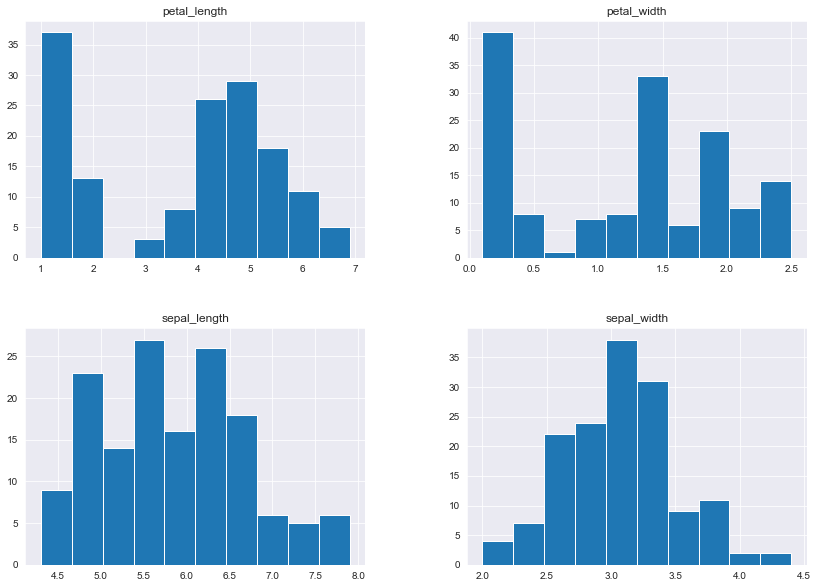

In [39]:
dt.hist()

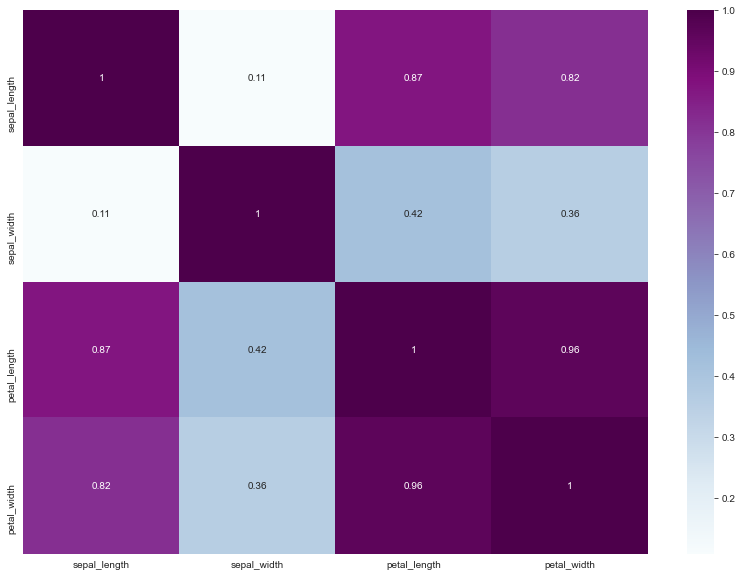

In [40]:
fig, ax = plt.subplots(figsize = (14,10))

ax =sns.heatmap(abs(dt.corr()), cmap='BuPu', annot = True)

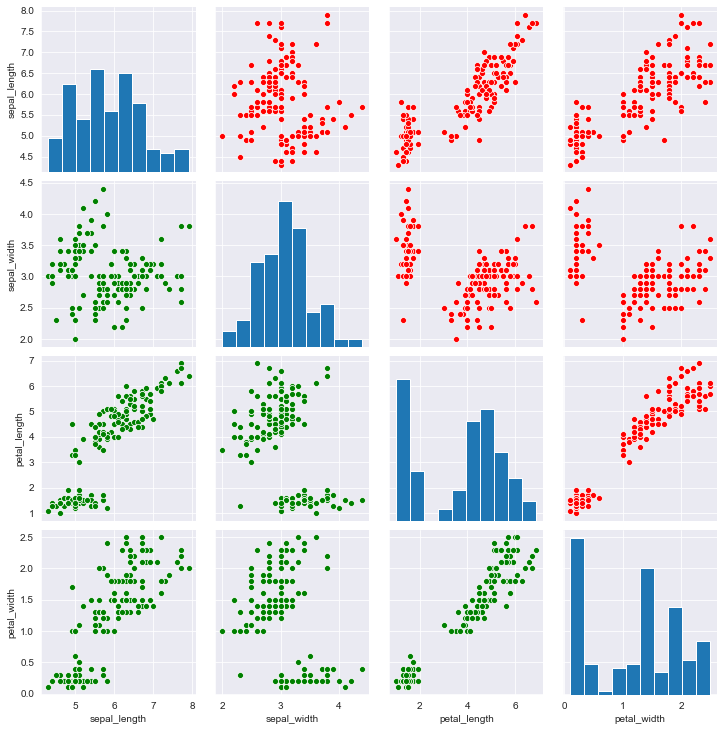

In [41]:
g = sns.PairGrid(dt)
g.map_upper(sns.scatterplot,color='red')
g.map_lower(sns.scatterplot, color='green')
g.map_diag(plt.hist)

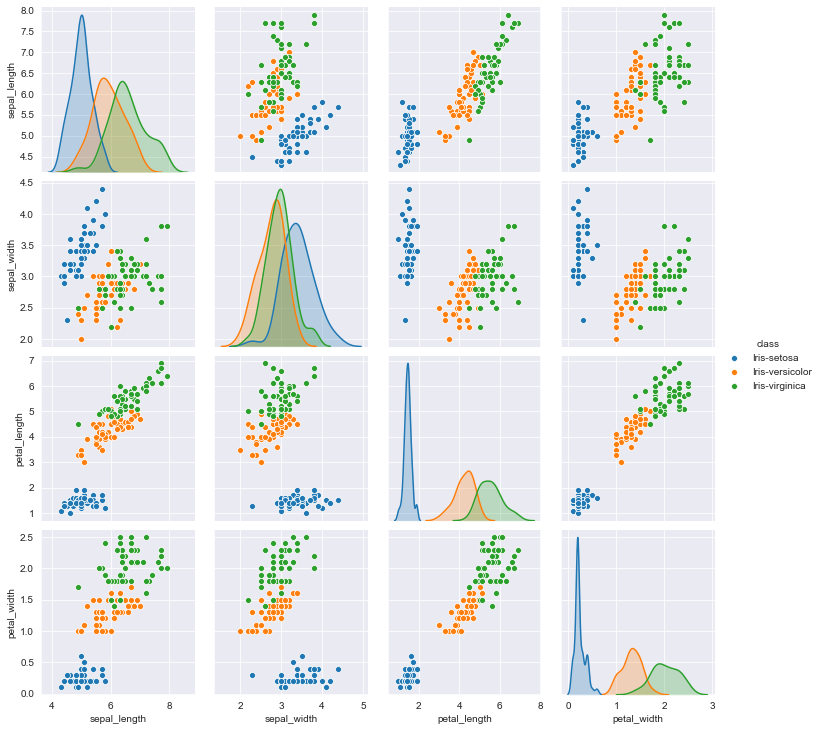

In [42]:
sns.pairplot(iris_df, hue= 'class')

## Dropping Class column 

In [43]:
dt = dt.drop(['class'], axis = 1)

In [44]:
dt

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Splitting data into X and y

In [45]:
X = dt.iloc[:,:-1].values
y = dt.iloc[:,-1].values

In [46]:
X

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.1, 1.5],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3

In [47]:
y

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

## Splitting the data into test _train _split

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

## Applying linear regression model 

In [49]:
from sklearn.linear_model import SGDRegressor, LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred = lin_reg.predict(X_test)

In [51]:
print("mean_absoulute error is: ",mean_absolute_error(y_test, y_pred))
print("mean_squared error is: ", mean_squared_error(y_test, y_pred))
print("r2 score is: ",r2_score(y_test, y_pred))

mean_absoulute error is:  0.14067775456278653
mean_squared error is:  0.031023816998615197
r2 score is:  0.9512075325249342


## Plotting Regression Graphs using seaborn

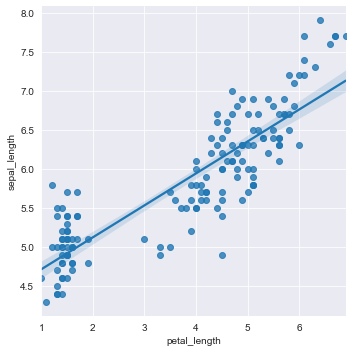

In [52]:
sns.set_style('darkgrid') 
sns.lmplot(x ='petal_length', y ='sepal_length', data = dt) 

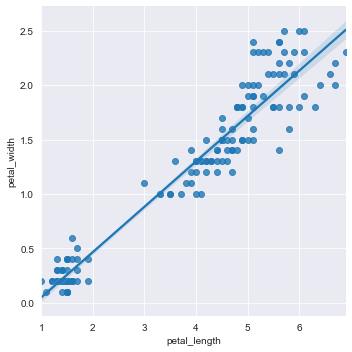

In [53]:
sns.set_style('darkgrid') 
sns.lmplot(x ='petal_length', y ='petal_width', data = dt) 

## Polynomial Regression

In [54]:
#SGD
from sklearn.linear_model import SGDRegressor, LinearRegression
regressor = SGDRegressor(max_iter=1000, tol=1e-4, alpha =0.01, random_state = 0, eta0 = 0.0001)
regressor.fit(X_train,y_train)

SGDRegressor(alpha=0.01, eta0=0.0001, random_state=0, tol=0.0001)

## Predicting the value

In [55]:
y_pred1 = regressor.predict(X_test)
#r2 result
r_squared1 = r2_score(y_test, y_pred1)
print("Coefficient of Determination using sgd method= ",r_squared1)

Coefficient of Determination using sgd method=  0.7563012431079941


In [56]:
y_pred1

array([1.72832087, 0.82557993, 1.9223754 , 2.04451716, 1.95529805,
       1.45778562, 1.58770829, 0.72572539, 0.79836631, 1.61295134,
       0.75093737, 0.7295107 , 0.69080111, 1.5091791 , 1.54212516,
       0.71988396, 1.16597185, 0.65876242, 0.79348675, 1.57128592,
       0.6636654 , 1.77094816, 1.48216813, 0.74699625, 0.72273848,
       0.73047256, 0.65014439, 0.71306491, 0.80329271, 1.57022273,
       1.40434367, 0.671345  , 1.80015575, 0.69954389, 1.1203653 ,
       1.77094816, 1.87962338, 1.33662914, 1.5596652 , 0.75179791,
       1.94663318, 0.7256709 , 1.49568915, 0.75768617, 1.72832087])

## Converting the independent variables  with degree of polynomial 2

In [57]:
poly_reg = PolynomialFeatures(degree=2)
X_train = poly_reg.fit_transform(X_train)
# feature scaling for training data set
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)

poly_reg = PolynomialFeatures(degree=2)
X_test = poly_reg.fit_transform(X_test)
#feature scaling for testing dataset
sc_X = StandardScaler()
X_test = sc_X.fit_transform(X_test)

In [58]:
#SGD
from sklearn.linear_model import SGDRegressor, LinearRegression
regressor = SGDRegressor(max_iter=10000, tol=1e-4, alpha =0.01, random_state = 0, eta0 = 0.0001)
regressor.fit(X_train, y_train)

SGDRegressor(alpha=0.01, eta0=0.0001, max_iter=10000, random_state=0,
             tol=0.0001)

In [59]:
#predicting the value
y_pred1 = regressor.predict(X_test)
#r2 result
from sklearn.metrics import r2_score
r_squared1 = r2_score(y_test[:2217], y_pred1[:len(y_test)])
print("r2_score: ",r_squared1)

r2_score:  0.8631541991107702


# VISUALIZATION OF LINEAR AND POLYNOMIAL MODEL

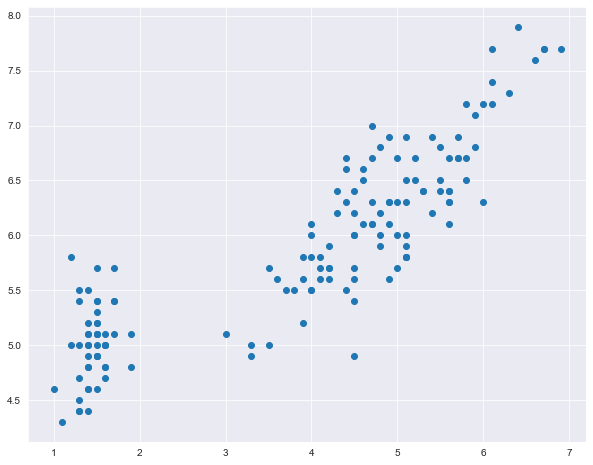

In [70]:
X = dt.petal_length.values
y = dt.sepal_length.values
plt.figure(figsize=(10,8))
plt.scatter(X, y)

0.7599553107783261


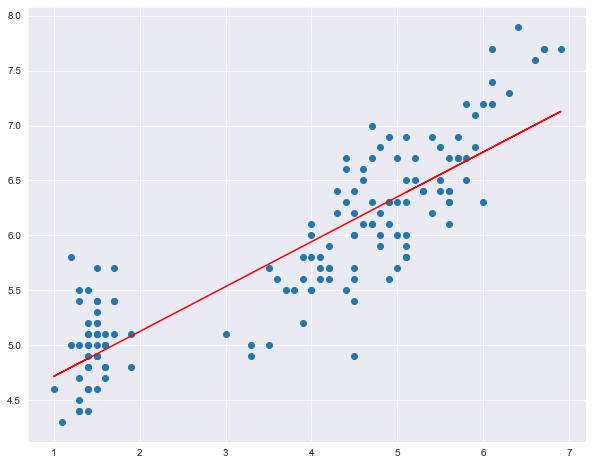

In [72]:
lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1, 1), y)
model_pred = lin_reg.predict(X.reshape(-1,1))
plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, model_pred, color = 'red');
print(r2_score(y, model_pred))

## Visualization of Polynomial model

In [79]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X.reshape(-1, 1))

0.8094606385900628


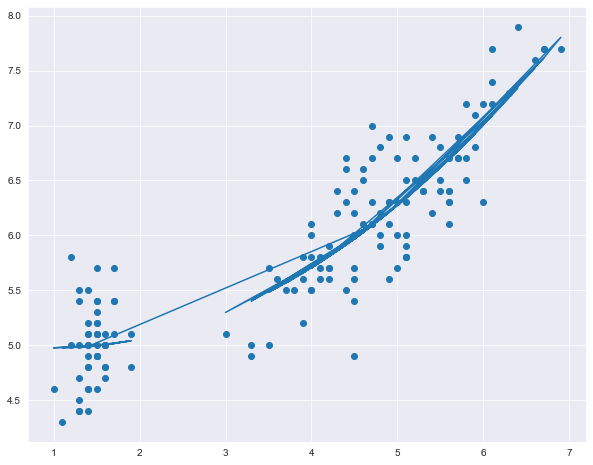

In [80]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y.reshape(-1, 1))
y_pred = lin_reg_2.predict(X_poly)
plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, y_pred);
print(r2_score(y, y_pred))